#### Here we do some basic visualization on the biometric data (full protocol dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import sys
%matplotlib inline

In [2]:
all_data = pd.read_csv("All_subjects_activities.csv")

To reduce the size of the dataset for plotting purposes, lets consider just the rows for which we have (uninterpolated) heart rate data

In [3]:
all_data.dropna(inplace=True)

This provides a summary of the 12 activities (plus activity 0, which is classed as 'other')

In [4]:
all_data.groupby('activityID').mean()

,timestamp,heartrate,T_hand,A1C1_hand,A1C2_hand,A1C3_hand,A2C1_hand,A2C2_hand,A2C3_hand,G1C1_hand,...,G1C2_ankle,G1C3_ankle,M1C1_ankle,M1C2_ankle,M1C3_ankle,O1_ankle,O2_ankle,O3_ankle,O4_ankle,subject
activityID,,,,,,,,,,,,,,,,,,,,,
0,2100.694043,114.835633,32.437965,-5.009849,3.602382,2.252432,-4.929249,3.614997,2.429157,-0.011680,...,-0.029955,0.006918,-35.133358,1.957055,16.119490,0.435656,0.085101,0.323945,0.060999,4.358176
1,205.791106,75.528819,32.724872,3.670616,2.062039,6.363077,3.784250,2.033350,6.584352,-0.002988,...,-0.006172,0.005622,-17.924229,20.570173,0.137907,0.332493,0.104581,0.415342,-0.440815,4.487966
2,506.403874,80.015520,33.261244,-1.379753,4.290048,5.174938,-1.252347,4.291551,5.385051,-0.001688,...,-0.005074,0.004852,-22.564288,2.516400,21.133117,0.223474,-0.361038,0.164740,-0.337771,4.307861
3,733.341080,88.557082,33.638727,-7.082347,3.221019,2.662256,-6.947575,3.263391,2.881402,0.001265,...,-0.004255,0.004528,-22.645647,-0.560624,24.428802,0.279118,-0.233011,0.158443,-0.195442,4.590751
4,2430.952810,112.776979,32.293960,-10.085077,2.505266,1.892576,-10.079568,2.533707,2.062577,-0.044021,...,-0.104074,-0.040866,-37.003329,-0.813734,15.771338,0.415030,0.002741,0.375182,-0.016905,4.625726
5,3443.833349,156.637507,30.829753,-6.881030,6.483698,0.204348,-6.961181,6.212682,0.310621,0.148271,...,-0.062238,0.068468,-36.373948,-8.414076,13.144543,0.499450,-0.031417,0.309543,-0.011503,4.641662
6,3127.945176,124.903837,31.009547,-5.160804,2.481830,7.070429,-5.173293,2.514935,7.241116,-0.044619,...,0.038998,0.006946,-38.904036,-6.903619,12.907609,0.479002,-0.026333,0.387678,0.030728,4.699525
7,2901.480654,123.809871,31.547024,-4.681095,5.136148,2.557227,-4.683723,4.990725,2.683452,0.003353,...,-0.135724,0.006970,-37.397603,-0.809455,14.319471,0.438481,-0.007431,0.395431,-0.040890,4.873584
12,1807.033794,129.537994,33.527678,-8.731194,3.662227,1.592128,-8.636462,3.694548,1.782991,-0.338015,...,0.138483,-0.018802,-35.747248,-4.860973,13.705696,0.479443,-0.078453,0.343512,-0.039635,4.407328


### Boxplot of the distribution of heart rate vs. activity ID

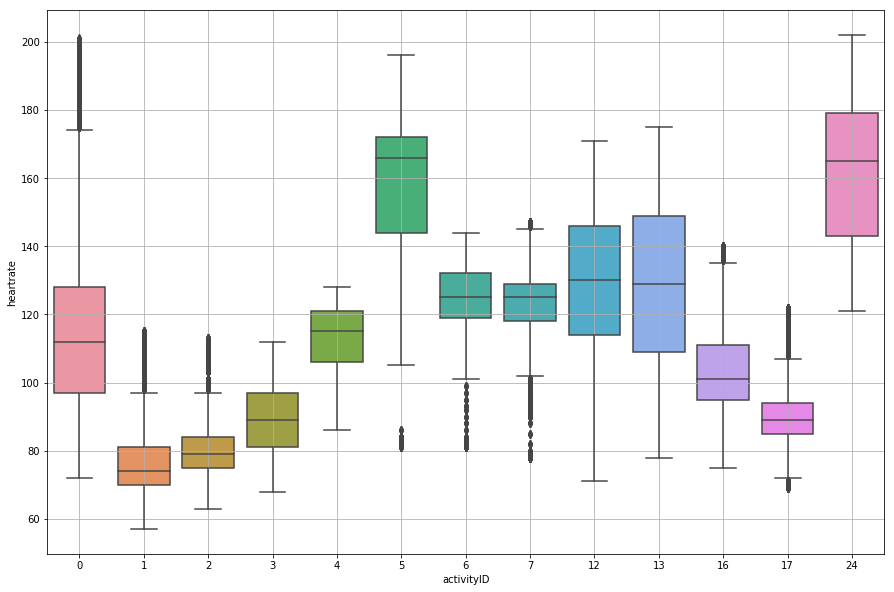

In [5]:
plt.figure(figsize=(15,10))
sns.boxplot(x='activityID',y='heartrate',data=all_data)
plt.grid()

#### For ease of visulalization, lets just compare the heartrate and temperature data across the various activities

In [6]:
all_data = all_data[['activityID','heartrate','T_hand','T_chest','T_ankle']]

In [7]:
target = all_data['activityID']
X = all_data.drop('activityID',axis=1)

#### We might expect a strong correlation between heart rate and the three temperature features

First lets look that their distributions 

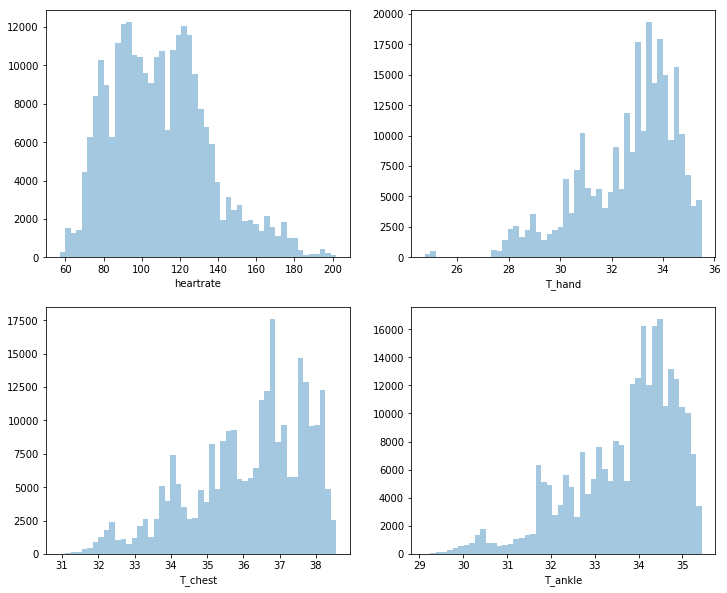

In [8]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.distplot(X['heartrate'],ax=ax1,kde=False)
sns.distplot(X['T_hand'],ax=ax2,kde=False)
sns.distplot(X['T_chest'],ax=ax3,kde=False)
sns.distplot(X['T_ankle'],ax=ax4,kde=False)

We can also look at their distributions colored by activity

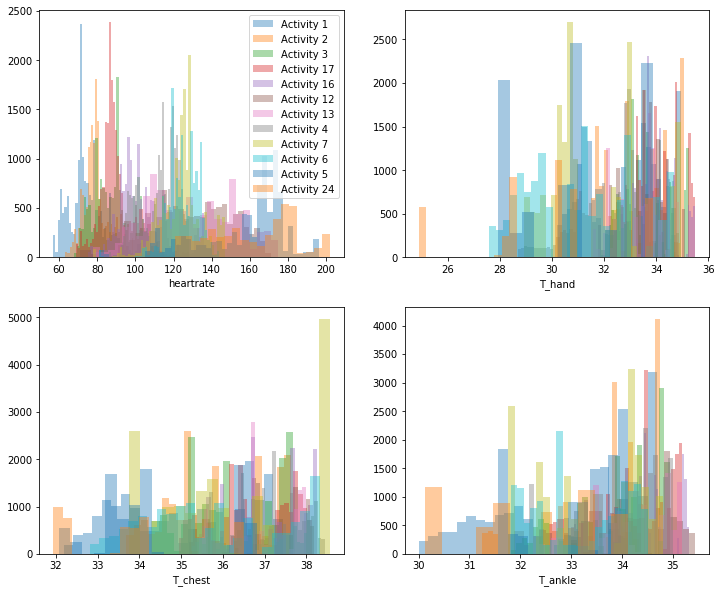

In [9]:

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

for activity in target.unique():
    if activity != 0:
        activity_label = 'Activity %s' %str(activity) 
        tmp_df = all_data[all_data['activityID']==activity]
        
        sns.distplot(tmp_df['heartrate'],kde=False,label=activity_label,ax=ax1)
        ax1.legend()
        sns.distplot(tmp_df['T_hand'],kde=False,label=activity_label,ax=ax2)
        sns.distplot(tmp_df['T_chest'],kde=False,label=activity_label,ax=ax3)
        sns.distplot(tmp_df['T_ankle'],kde=False,label=activity_label,ax=ax4)
        

This indicates that there is quite alot of overlap between the temperature and heartrate signatures of the various activities

#### Now lets take a look at any potential correlations

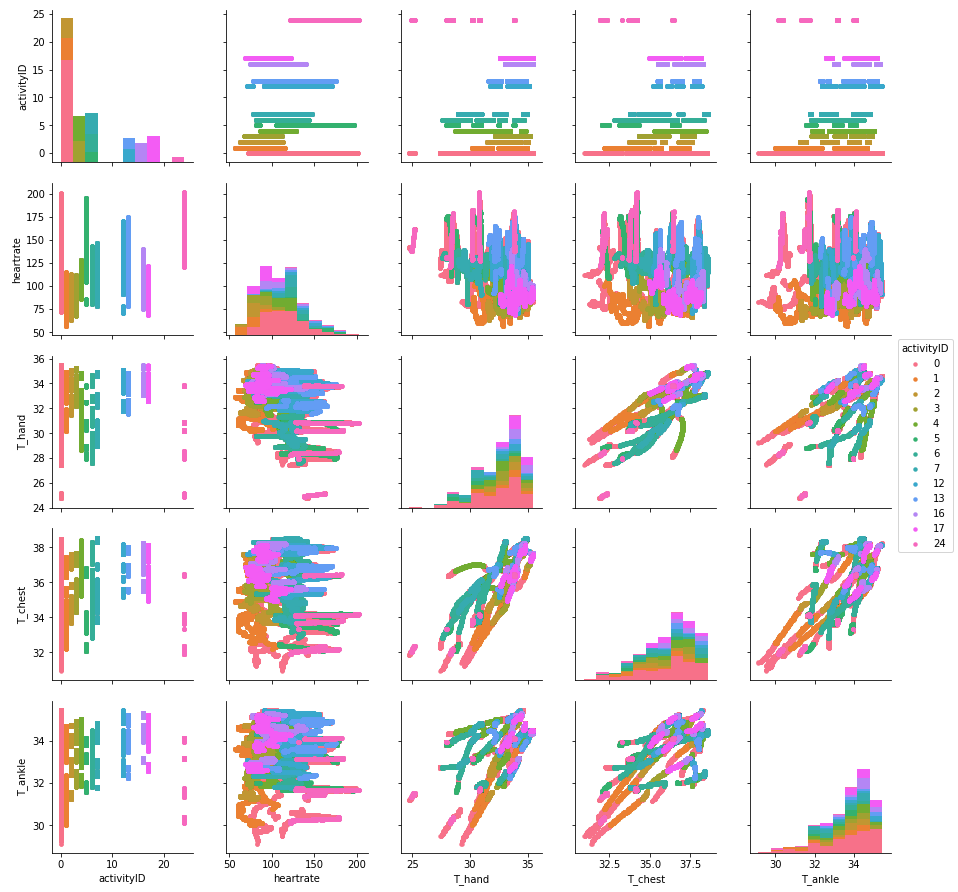

In [22]:
sns.pairplot(all_data,kind='scatter',plot_kws={"s": 20,'linewidth':0},hue='activityID', palette="husl")

It looks like there are strong correlations between the temperature variables, but weak correlations between the temperature variables and heart rate. The activities are not well separated in any of the plots